# Review for tensorboard

In [6]:
import tensorflow as tf

In [8]:
mkdir graphs

子目录或文件 graphs 已经存在。


In [9]:
a = 2
b = 3
x = tf.add(a, b)
y = tf.multiply(a, b)
useless = tf.multiply(a, x)
z = tf.pow(y, x)
with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graphs', sess.graph)
    print (sess.run(z))

7776


graph_03
可以自己在变量定义时候加上名字，否则这里会默认使用x，y
![graph_03](graph_03.png)

# Linear regression

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import xlrd
%matplotlib inline

In [15]:
DATA_FILE = "slr05.xls"

In [17]:
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i)  for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

In [20]:
data

array([[   6.2,   29. ],
       [   9.5,   44. ],
       [  10.5,   36. ],
       [   7.7,   37. ],
       [   8.6,   53. ],
       [  34.1,   68. ],
       [  11. ,   75. ],
       [   6.9,   18. ],
       [   7.3,   31. ],
       [  15.1,   25. ],
       [  29.1,   34. ],
       [   2.2,   14. ],
       [   5.7,   11. ],
       [   2. ,   11. ],
       [   2.5,   22. ],
       [   4. ,   16. ],
       [   5.4,   27. ],
       [   2.2,    9. ],
       [   7.2,   29. ],
       [  15.1,   30. ],
       [  16.5,   40. ],
       [  18.4,   32. ],
       [  36.2,   41. ],
       [  39.7,  147. ],
       [  18.5,   22. ],
       [  23.3,   29. ],
       [  12.2,   46. ],
       [   5.6,   23. ],
       [  21.8,    4. ],
       [  21.6,   31. ],
       [   9. ,   39. ],
       [   3.6,   15. ],
       [   5. ,   32. ],
       [  28.6,   27. ],
       [  17.4,   32. ],
       [  11.3,   34. ],
       [   3.4,   17. ],
       [  11.9,   46. ],
       [  10.5,   42. ],
       [  10.7,   43. ],


In [23]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

In [24]:
w = tf.Variable(0.0, name="weights")
b = tf.Variable(0.0, name="bias")

In [25]:
Y_predicted = X * w + b

In [26]:
loss = tf.square(Y - Y_predicted, name="loss")

In [27]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [33]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(100):
        for x, y in data:
            sess.run(optimizer, feed_dict={X: x, Y: y})
    w_value, b_value = sess.run([w, b])
w_value, b_value

(1.7183813, 15.789157)

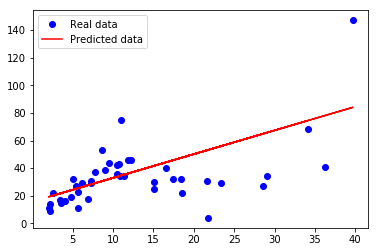

In [41]:
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w_value + b_value, 'r', label='Predicted data')
plt.legend()
plt.show()

# Graph of model

![name](graph_linear_reg.png)

In [42]:
# create an optimizer.
optimizer = GradientDescentOptimizer(learning_rate=0.1)
# compute the gradients for a list of variables.
grads_and_vars = opt.compute_gradients(loss, <list of variables>)
# grads_and_vars is a list of tuples (gradient, variable). Do whatever you
# need to the 'gradient' part, for example, subtract each of them by 1.
subtracted_grads_and_vars = [(gv[0] - 1.0, gv[1]) for gv in grads_and_vars]
# ask the optimizer to apply the subtracted gradients.
optimizer.apply_gradients(subtracted_grads_and_vars)

SyntaxError: invalid syntax (<ipython-input-42-66ba24c3b1d6>, line 4)